# **Part 1: Exploring the friendship paradox**

**1.1 THE FRIENDSHIP PARADOX IN BA NETWORK**

The friendship paradox states that, on average, one's friends will have more friends than the individual themselves. Friendship paradox using BA or the Barabási-Albert model can be explored by calculating the average degree of nodes and the average degree of neighbor nodes. 

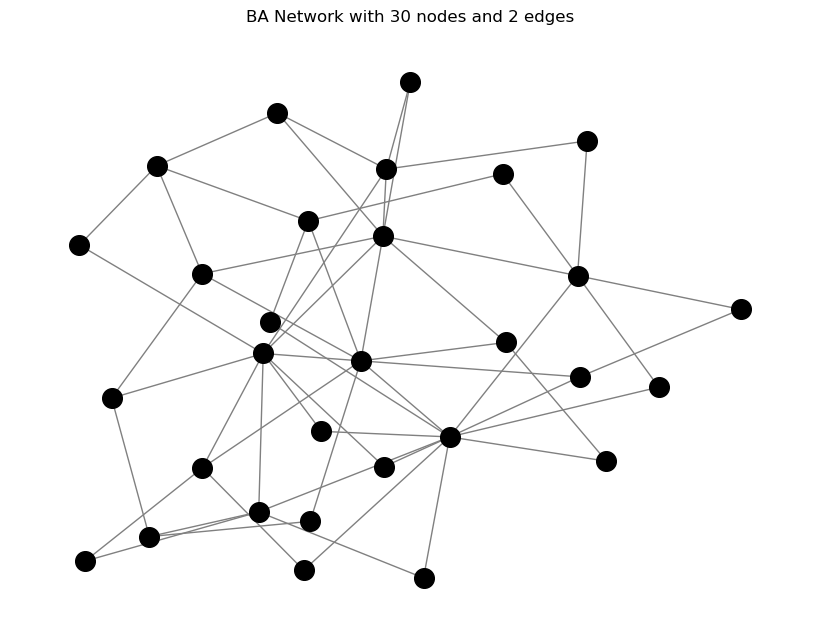

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

#setting random parameters for the Barabási-Albert (BA) model
n = 30  # Number of nodes
m = 2   # Number of edges to attach from a new node to existing nodes

#creating a BA network using NetworkX
BA_network = nx.barabasi_albert_graph(n, m)

#draw the network
plt.figure(figsize=(8, 6))
nx.draw(BA_network, with_labels=False, node_color='black', node_size=200, edge_color='gray')
plt.title(f"BA Network with {n} nodes and {m} edges")
plt.show()


Let's now caclulate the average degree of a individual note and the average degree of the neighbor. 

In [23]:

aAverage degree of the network
average_degree = sum(dict(BA_network.degree()).values()) / na2. Average degree of neighbors for each node (Friendship Paradox calculation)
neighbor_degrees = []
for node in BA_network.nodes:
    neighbors = list(BA_network.neighbors(node))
    if neighbors:
        avg_neighbor_degree = sum(BA_network.degree(neighbor) for neighbor in neighbors) / len(neighbors)
        neighbor_degrees.append(avg_neighbor_ae)

# 3. Average degree of neighbors overall
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

average_degree, average_neighbor_degree


(3.7333333333333334, 5.898880471380471)

The average degree of one nodes is approximately **3.73**. <br>
The average degree of the neighbors of each node is approximately **5.89**. <br>
This shows the friendship paradox in action: on average, a node's neighbors have more connections than the node itself.

**1.2 THE FRIENDSHIP PARADOX MORE GENERALLY**


In this part, we will have the friendship paradox beyond BA model by applying the Erdős-Rényi(ER) Network. <br>
The **Erdős-Rényi Random Network** is a way to randomly connect points (or people) based on a set probability. It gives us a basic understanding of how connections might form in a network without any special rules or patterns.

Average degree of nodes: 4.80
Average degree of neighbors: 5.70


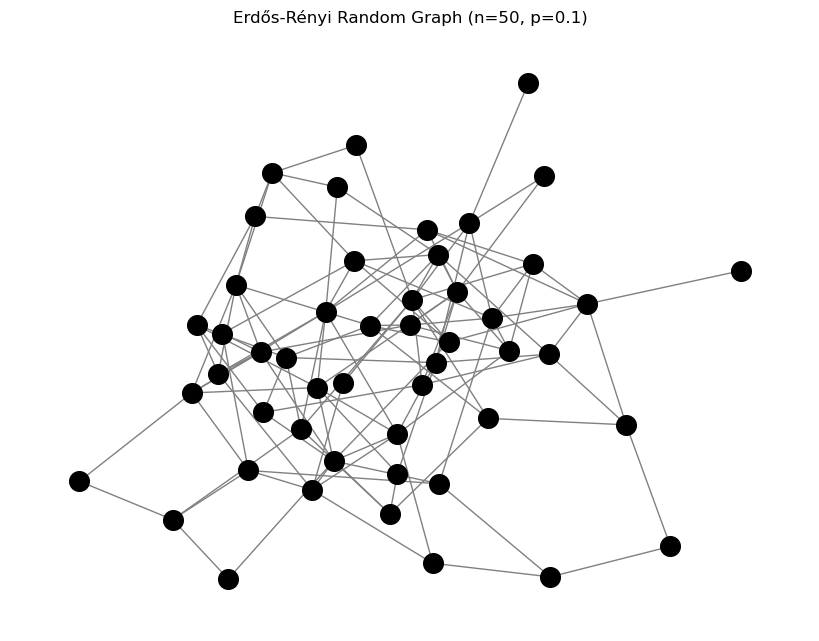

In [54]:
import numpy as np

#generate an Erdős-Rényi random graph
n = 50  # number of nodes
p = 0.1  # probability of edge creation

ER_network = nx.erdos_renyi_graph(n, p)

#Calculate the average degree of the network
average_degree = sum(dict(ER_network.degree()).values()) / n

#Calculate the average degree of neighbors for each node
neighbor_degrees = []
for node in ER_network.nodes:
    neighbors = list(ER_network.neighbors(node))
    if neighbors:  # Avoid division by zero
        avg_neighbor_degree = sum(ER_network.degree(neighbor) for neighbor in neighbors) / len(neighbors)
        neighbor_degrees.append(avg_neighbor_degree)

#average degree of neighbors
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees)

#compare the two averages
print(f"Average degree of nodes: {average_degree:.2f}")
print(f"Average degree of neighbors: {average_neighbor_degree:.2f}")

#visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(ER_network, with_labels=False, node_color='black', node_size=200, edge_color='gray')
plt.title(f"Erdős-Rényi Random Graph (n={n}, p={p})")
plt.show()


**1.3 THE FRIENDSHIP PARADOX AND THE CONFIGURATION MODEL**

The configuration model helps to build a network with a pre-defined degree sequence. 
In the network generated by the model each node has a pre-defined degree ki, but otherwise, the network is wired randomly. In this **Configuration Model** we are generating one network with a pre-defined sequence set by us. 

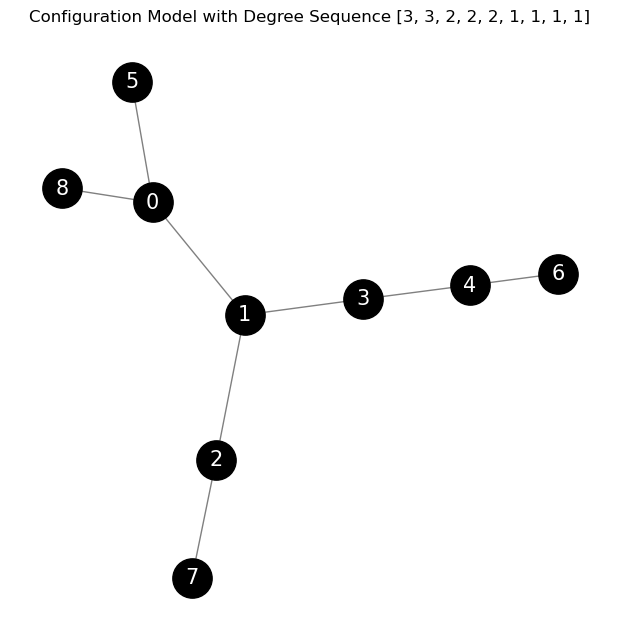

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

#defined degree sequence
degree_sequence = [3, 3, 2, 2, 2, 1, 1, 1, 1]

#keep generating the configuration model until it's connected
connected = False

while not connected:
    #step 1: Create a configuration model based on the degree sequence
    config_model = nx.configuration_model(degree_sequence)
    
    #step 2: Convert the MultiGraph to a simple Graph (remove parallel edges and self-loops)
    config_model = nx.Graph(config_model)
    
    #step 3: Check if the generated graph is connected
    if nx.is_connected(config_model):
        connected = True

#step 4: Visualize the network once its connected
plt.figure(figsize=(6, 6))

#using spring layout for better visualization
pos = nx.spring_layout(config_model, seed=42)

#draw the graph
nx.draw(config_model, pos, with_labels=True, node_color='black', 
        node_size=800, font_size=15, font_color='white', edge_color='gray')

plt.title("Configuration Model with Degree Sequence [3, 3, 2, 2, 2, 1, 1, 1, 1]")
plt.show()


In [61]:
#compute and print the table

print(f"{'Node':>5} | {'Degree':>6} | {'Avg Neighbor Degree':>20}")
print("-" * 33)

for node in config_model.nodes:
    node_degree = config_model.degree[node]  # Degree of the current node
    neighbors = list(config_model.neighbors(node))  # Get the neighbors of the node
    if neighbors:  # Avoid division by zero if there are no neighbors
        avg_neighbor_degree = sum(config_model.degree[n] for n in neighbors) / len(neighbors)
    else:
        avg_neighbor_degree = 0
    
    print(f"{node:>5} | {node_degree:>6} | {avg_neighbor_degree:>20.2f}")


 Node | Degree |  Avg Neighbor Degree
---------------------------------
    0 |      3 |                 1.67
    1 |      3 |                 2.33
    2 |      2 |                 2.00
    3 |      2 |                 2.50
    4 |      2 |                 1.50
    5 |      1 |                 3.00
    6 |      1 |                 2.00
    7 |      1 |                 2.00
    8 |      1 |                 3.00


The friendship paradox is observed in many nodes within this network. 
Specifically, the paradox shows that, on average, most nodes have fewer connections (lower degree) 
than their neighbors (friends). 
For example, consider Node 5, which has a degree of 1 (only one connection), 
but its neighbor(s) have an average degree of 3.00. This indicates that Node 5's friends, on average, 
have more friends than Node 5. 
This is a common phenomenon in real-world social networks and highlights how well-connected individuals 
tend to dominate the average connection count, skewing the perception of network connectivity.
